# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Oct 1, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Kaiyan Jiang

Student ID: 1003848189

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


 <font color='red'>**Remember to push your work on GitHub and share the link of your private repo on Quercus.**</font> 




# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? 30
* How many observations have a 'mean area' of greater than 700? 171
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame(dataset.data[:],columns=dataset.feature_names)
df['target'] = dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.columns.size-1 
## Number of columns subtract the last column for 'target' to get the number of features

30

In [5]:
df.loc[df['mean area'] > 700]
## Filter the data with mean area > 700

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.0,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.0,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.2,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.3,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [6]:
df.target.value_counts()
## Count the number of each test results

1    357
0    212
Name: target, dtype: int64

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [7]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




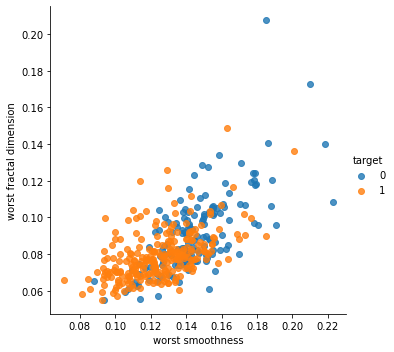

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="worst smoothness", y="worst fractal dimension", data=df_train, hue="target", fit_reg=False)

plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train)
df_norm = scaler.transform(df_train)
## Standardization of df_train

df_norm = pd.DataFrame(df_norm,columns=df.columns)
condition = df_norm['target']==-1.292726165743277
condition1 = df_norm['target']!=-1.292726165743277
df_norm.loc[condition, 'target'] = 0
df_norm.loc[condition1, 'target'] = 1
## Change the standardized target value into original scale 
## as target value do not need to be scale

## Code For Replace Values From: 
## https://www.kite.com/python/answers/how-to-replace-values-in-a-pandas-dataframe-that-satisfy-a-condition-in-python

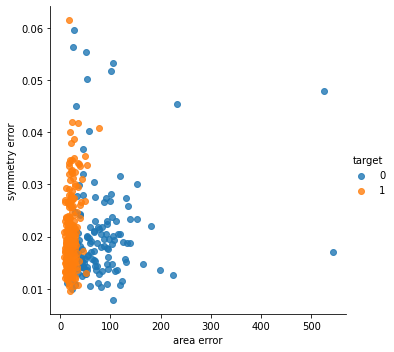

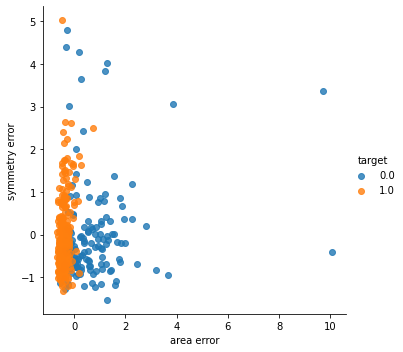

In [10]:
sns.lmplot(x="area error", y="symmetry error", data=df_train, hue="target", fit_reg=False)
sns.lmplot(x="area error", y="symmetry error", data=df_norm, hue="target", fit_reg=False)

plt.show()

From the two plots above, the distribution of points in both plots are generally same. There is no significant difference seen.  

But the scale of both axis changed. In the plot before standardization, the x-axis (area error) and the y-axis (symmetry error) have different scales. While after standardization, they all have a same scale.  

Hence, the advantage of standardization I think is to make two features with very different scales to have a same scale, which is easier to compare and analyze. 

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




Step 1  

In [11]:
X= df.iloc[:,0:30]
target_data=df.iloc[:,30]

X_train, X_test, target_train, target_test = train_test_split(X, target_data, test_size=0.3, random_state=0)
## Split data

In [12]:
from sklearn.model_selection import cross_validate
from sklearn import neighbors

k = list(range(1,101))
k

lst = []
for i in k:
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn, X_train, target_train, cv=5,return_train_score=True)
  mean_valid_accuracy = scores['test_score'].mean()
  lst.append(mean_valid_accuracy)

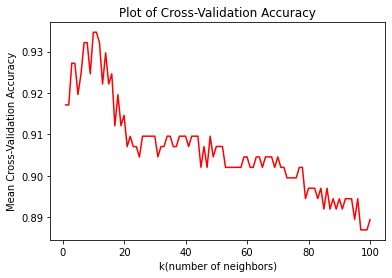

In [13]:
import matplotlib.pyplot as plt

plt.plot(k, lst,'r')

plt.title("Plot of Cross-Validation Accuracy")
plt.xlabel('k(number of neighbors)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.show()

Step 2

In [14]:
max_accuracy = max(lst)
max_index = lst.index(max_accuracy)

## Find maximum accuracy and the corresponding index

In [15]:
print(max_accuracy)

## The highest mean cross-validation accuracy

0.9346518987341772


In [16]:
print(max_index+1)

## As index starts at 0, so we should plus one to get the best k value

10


The best k is 10. And the highest cross-validation accuracy is 0.9346518987341772.

Step 3

In [17]:
from sklearn.model_selection import validation_curve

parameter_range = k
train_score, test_score = validation_curve(neighbors.KNeighborsClassifier(), X_train, target_train,
                                           param_name = "n_neighbors",
                                           param_range = parameter_range,
                                           cv = 5, scoring = "accuracy")

## Validation Curve

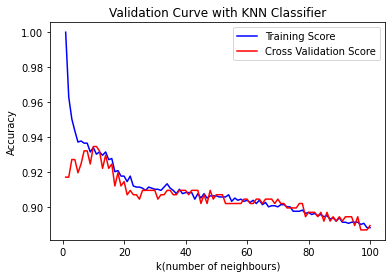

In [18]:
mean_train_score = np.mean(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)

plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("k(number of neighbours)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Code from: https://www.geeksforgeeks.org/validation-curve/

In [19]:
np.where(mean_train_score <= mean_test_score)

(array([ 9, 10, 11, 26, 38, 39, 41, 42, 43, 47, 49, 50, 51, 58, 59, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 74, 75, 76, 77, 79, 80, 81, 83, 85,
        87, 88, 89, 90, 91, 92, 93, 95, 99]),)

At the left side of the Training and Validation Curves plot, the mean train accuracy obviously exceeds the mean validation accuracy, where this represents the models are overfitting.  
And this trend ends when the mean train accuracy is less than the mean validation accuracy for the first time. And there is no significant overfitting or underfitting when the number of neighbours goes up.  
Because at this time, the line of score accuracy and the line of cross-validation accuracy are nearly overlapped with a small gap.   

Hence, using *np.where()* function to figure out the point is at index 9, where the number of neighbors at this point is 10.  

Therefore, it can be concluded that when *k<10*, the models are overfitting.  



## Part 3: Feature Selection [4 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use the following link to get familiar with extracting the feature impotance order of machine learning algorithms in Python: 

https://machinelearningmastery.com/calculate-feature-importance-with-python/

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to remove another feature. To do that we fit a new decision tree to the remaining features and identify the least important feature. 


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[3]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Each time, removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 1, fit a new tree on the reduced dataset and follow all the steps until you meet the stop condition. 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [20]:
from sklearn import tree

def Feature_selector (x_train , y_train , tr=0.95):
 
  Results = []

  for v in range(1,30):
    dt = tree.DecisionTreeClassifier(random_state=0)
    dt.fit(x_train,y_train)
    importance = dt.feature_importances_
    important_features = pd.Series(data=importance,index=x_train.columns)
    important_features.sort_values(ascending=False,inplace=True)
    ## Code From: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
    
    x_train = x_train.drop(columns=[important_features.index[-1]]) 
  
    k = list(range(1,101))
    L = []

    for i in k:
      knn = neighbors.KNeighborsClassifier(n_neighbors=i)
      scores = cross_validate(knn, x_train, target_train, cv=5,return_train_score=True)
      mean_valid_accuracy = scores['test_score'].mean()
      L.append(mean_valid_accuracy) 
    
    new = [important_features.index[-1],max(L),L.index(max(L))+1]
    
    Index = L.index(max(L))

    Results.append(new)

    v = v+1

    if len(x_train.columns) == 1 or max(L) < tr * lst[Index]:
      break
      
  
  return Results

In [21]:
Results = Feature_selector(X_train,target_train,tr=0.95)

In [22]:
Results

[['mean radius', 0.9346518987341772, 10],
 ['mean texture', 0.9346518987341772, 10],
 ['compactness error', 0.9346518987341772, 10],
 ['concavity error', 0.9346518987341772, 10],
 ['smoothness error', 0.9346518987341772, 10],
 ['mean perimeter', 0.9321518987341773, 7],
 ['concave points error', 0.9321518987341773, 7],
 ['mean area', 0.9145886075949367, 34],
 ['symmetry error', 0.9145886075949367, 34],
 ['mean smoothness', 0.9145886075949367, 34],
 ['mean compactness', 0.9145886075949367, 34],
 ['mean concavity', 0.9145886075949367, 34],
 ['mean concave points', 0.9145886075949367, 34],
 ['worst fractal dimension', 0.9145886075949367, 34],
 ['mean fractal dimension', 0.9145886075949367, 34],
 ['texture error', 0.9145886075949367, 34],
 ['perimeter error', 0.9145886075949367, 34],
 ['worst perimeter', 0.9145569620253164, 61],
 ['worst compactness', 0.9145569620253164, 61],
 ['worst radius', 0.9145569620253164, 61],
 ['worst smoothness', 0.9145569620253164, 61],
 ['radius error', 0.914556

In [23]:
Mean_cross_valid_acc = [max_accuracy]

for i in range(0,29):
  Mean_cross_valid_acc.append(Results[i][1])

## List of Mean Cross-validation Accuracy 

In [24]:
a = list(range(1,len(Results)+1,1)) 

number_of_feature = [30] + [30-x for x in a]

## Code from: https://www.codegrepper.com/code-examples/python/subtract+value+from+every+element+in+list+python

## List of Number of Features

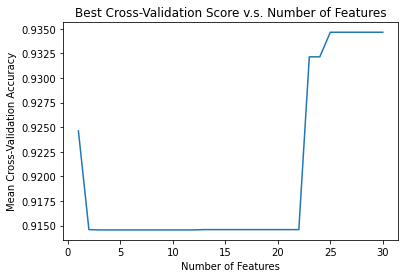

In [25]:
plt.plot(number_of_feature, Mean_cross_valid_acc)
plt.title("Best Cross-Validation Score v.s. Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.show()

In [26]:
Best_value_k = [max_index+1]

for i in range(0,29):
  Best_value_k.append(Results[i][2])

## List of Best k Values

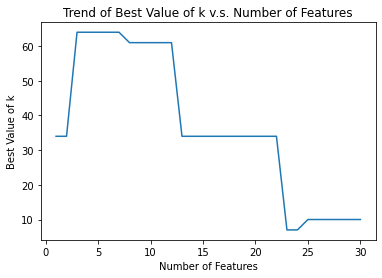

In [27]:
plt.plot(number_of_feature, Best_value_k)
plt.title("Trend of Best Value of k v.s. Number of Features")
plt.xlabel("Number of Features")
plt.ylabel("Best Value of k")
plt.show()

## Part 4: Standardization [1.5 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) **[0.5]**

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 0.95\%.  **[0.5]**
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?) **[0.5]**


Step 1

In [28]:
scaler = StandardScaler()

scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

## Standardize X_train

In [29]:
scaler = StandardScaler()

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

## Standardize X_test

Step 2

In [30]:
X_scaled = pd.DataFrame(data=X_scaled, index=X_train.index.values, columns=X_train.columns)

In [31]:
Results_scaled = Feature_selector(X_scaled,target_train,tr=0.95)

In [32]:
Results_scaled

[['mean radius', 0.9649683544303798, 8],
 ['mean texture', 0.9623417721518986, 4],
 ['compactness error', 0.9623734177215189, 3],
 ['concavity error', 0.9648734177215189, 3],
 ['smoothness error', 0.9649050632911391, 8],
 ['mean perimeter', 0.9648417721518987, 3],
 ['concave points error', 0.9673417721518988, 3],
 ['mean area', 0.9648417721518987, 3],
 ['symmetry error', 0.9649050632911391, 8],
 ['mean smoothness', 0.9648734177215189, 8],
 ['mean compactness', 0.9699050632911392, 6],
 ['mean concavity', 0.9623417721518986, 8],
 ['mean concave points', 0.9598417721518986, 4],
 ['worst fractal dimension', 0.9623417721518986, 7],
 ['mean fractal dimension', 0.9648417721518987, 6],
 ['texture error', 0.9674050632911392, 10],
 ['perimeter error', 0.9674050632911392, 12],
 ['worst perimeter', 0.9623734177215189, 14],
 ['worst compactness', 0.9674367088607594, 8],
 ['worst radius', 0.9648734177215189, 12],
 ['worst smoothness', 0.9624050632911392, 18],
 ['radius error', 0.9599050632911392, 24

In [33]:
k = list(range(1,101))
k

l = []
for i in k:
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn, X_scaled, target_train, cv=5,return_train_score=True)
  mean_valid_accuracy = scores['test_score'].mean()
  l.append(mean_valid_accuracy)

## A KNN Classifier on the scaled dataset

In [34]:
max(l)

0.9674367088607594

In [35]:
Mean_cross_valid_acc_scaled = [max(l)]

for i in range(0,29):
  Mean_cross_valid_acc_scaled.append(Results_scaled[i][1])

Mean_cross_valid_acc_scaled.index(max(Mean_cross_valid_acc_scaled))
## List of Cross-Validation Accuracy of the scaled data

11

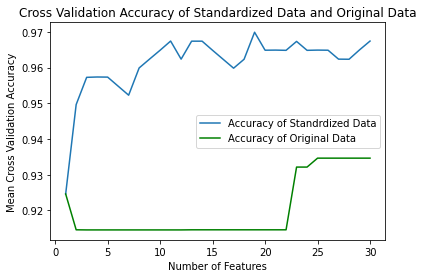

In [36]:
plt.plot(number_of_feature, Mean_cross_valid_acc_scaled,label="Accuracy of Standrdized Data")
plt.plot(number_of_feature, Mean_cross_valid_acc,'g',label="Accuracy of Original Data")

plt.title('Cross Validation Accuracy of Standardized Data and Original Data')
plt.legend()
plt.xlabel("Number of Features")
plt.ylabel("Mean Cross Validation Accuracy")

plt.show()

## Code From: https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php

Step 3

In [37]:
np.where(Mean_cross_valid_acc_scaled > Mean_cross_valid_acc)

(array([0]),)

Standardization would help the model performance.   

From the above plot and the *np.where* function, the cross validation accuracy of the standardized data are always higher than it of the original data, no matter the number of features change.

## Part 5: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results. **[0.5]**

In [38]:
max(Mean_cross_valid_acc_scaled)

## Find the highest accuracy

0.9699050632911392

In [39]:
Mean_cross_valid_acc_scaled.index(max(Mean_cross_valid_acc_scaled))-1

## Corresponding index

10

In [40]:
Results_scaled[10]

## Find the k value

['mean compactness', 0.9699050632911392, 6]

In [41]:
drop_feature = []

for i in range(0,11):
  drop_feature.append(Results_scaled[i][0])

drop_feature

['mean radius',
 'mean texture',
 'compactness error',
 'concavity error',
 'smoothness error',
 'mean perimeter',
 'concave points error',
 'mean area',
 'symmetry error',
 'mean smoothness',
 'mean compactness']

In [42]:
X_scaled_new = X_scaled.drop(columns=drop_feature)

## Drop the removed features

In [43]:
knn_6 = neighbors.KNeighborsClassifier(n_neighbors=6)
scores = cross_validate(knn_6, X_scaled_new, target_train, cv=5, return_train_score=True)

print('Mean Train Accuracy:',scores['train_score'].mean())
print('Mean Validation Accuracy:', scores['test_score'].mean())

## Code From: Tutorial 1

Mean Train Accuracy: 0.976132174050196
Mean Validation Accuracy: 0.9699050632911392


In [44]:
X_test_scaled = pd.DataFrame(data=X_test_scaled, index=X_test.index.values, columns=X_test.columns)
X_test1 = X_test_scaled.drop(columns=drop_feature)

## Drop the features in scaled X_test data

In [45]:
from sklearn.metrics import accuracy_score

knn_6.fit(X_scaled_new, target_train)
accuracy = accuracy_score(target_test, knn_6.predict(X_test1))
print ("Test set accuracy: ", accuracy )

## Code From: Tutorial 1

Test set accuracy:  0.9649122807017544


The model with highest accuracy is the one fitted with standardized data and with the removal of 11 features.  
The cross-validation accuracy for this model is 0.9699050632911392.  

After fitted the standardized test data with this model, we get a test set accuracy at 0.9649122807018544, which is very close to the mean cross-validation accuracy by fitting the train data.  

Hence, I may conclude that the model used here is appropriate as it has a high accuracy on test data. 

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/